#Spam SMS Classifier

In [2]:
import numpy as np
import pandas as pd


In [12]:
encodings = ['utf-8', 'latin', 'ISO-8859-1', 'cp1252']
file_path=r"/content/spam.csv"
for encoding in encodings:
    try:
        df=pd.read_csv(file_path, encoding=encoding)
        print("File succesfully read with encoding:",encoding)
        break
    except UnicodeDecodeError:
        print("Faild to Read Encoding: " ,encoding)
        continue
if 'df' in locals():
    print('File loaded')
else :
    print('Failed to load')

Faild to Read Encoding:  utf-8
File succesfully read with encoding: latin
File loaded


In [13]:
df.sample(10) #Sample of data set

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4885,ham,Or just do that 6times,NaN,NaN,NaN
3300,spam,RCT' THNQ Adrian for U text. Rgds Vatian,NaN,NaN,NaN
3973,ham,Roger that. WeÛ÷re probably going to rem in a...,NaN,NaN,NaN
4982,ham,Networking job is there.,NaN,NaN,NaN
4810,ham,E admin building there? I might b slightly ear...,NaN,NaN,NaN
5137,spam,YOU VE WON! Your 4* Costa Del Sol Holiday or å...,NaN,NaN,NaN
4580,ham,Not course. Only maths one day one chapter wit...,NaN,NaN,NaN
62,ham,Its a part of checking IQ,NaN,NaN,NaN
1049,spam,18 days to Euro2004 kickoff! U will be kept in...,NaN,NaN,NaN
753,ham,When did you get to the library,NaN,NaN,NaN


In [14]:
df.shape #DataMatrix

(5572, 5)

1. Data Cleaning
2. EDA
3. Data Preprocessing
4. Model Building
5. Evaluation
6. Building a Predictrive System

#Data Cleaning

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [16]:
#Dropping last 3 columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace=True)

In [17]:
df.sample(10)

,v1,v2
5205,spam,Had your mobile 11mths ? Update for FREE to Or...
4143,ham,That's a shame! Maybe cld meet for few hrs tomo?
864,ham,Dude ive been seeing a lotta corvettes lately
93,spam,Please call our customer service representativ...
4295,spam,Please CALL 08712402578 immediately as there i...
1509,ham,When u love someone Dont make them to love u a...
4489,ham,My computer just fried the only essential part...
4224,ham,\The world suffers a lot... Not because of the...
5004,ham,Guess which pub im in? Im as happy as a pig in...
4327,spam,Congrats! 2 mobile 3G Videophones R yours. cal...


In [18]:
#Renaming Col1 as Target & Col2 as Text
df.rename(columns={'v1': 'Target', 'v2': 'Text'},inplace=True)
df.sample(10)

,Target,Text
2090,ham,S:-)kallis wont play in first two odi:-)
4656,spam,PRIVATE! Your 2003 Account Statement for shows...
5327,ham,Wishing you a wonderful week.
954,spam,Filthy stories and GIRLS waiting for your
1992,spam,Free tones Hope you enjoyed your new content. ...
311,spam,Think ur smart ? Win å£200 this week in our we...
4238,ham,"Sez, hows u & de arab boy? Hope u r all good g..."
831,ham,Hi mate its RV did u hav a nice hol just a mes...
1515,ham,I wonder if you'll get this text?
2193,ham,I called but no one pick up e phone. I ask bot...


###Label Encoding

In [19]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [20]:
df['Target'] = encoder.fit_transform(df['Target'])

In [21]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


spam-1

ham-0

In [22]:
#missing values
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [23]:
#Check for Duplicates
df.duplicated().sum()

403

In [24]:
#Removing Duplicates
df= df.drop_duplicates(keep='first')

In [25]:
df.duplicated().sum()

0

In [26]:
df.shape

(5169, 2)

#Data Exploration

In [27]:
df['Target'].value_counts()

0    4516
1     653
Name: Target, dtype: int64

([<matplotlib.patches.Wedge at 0x7cdbc72b5c30>,
 [Text(-1.0144997251399075, 0.42519443516002464, 'Ham'),
  Text(1.014499764949479, -0.4251943401757036, 'Spam')],
 [Text(-0.5533634864399495, 0.23192423736001339, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

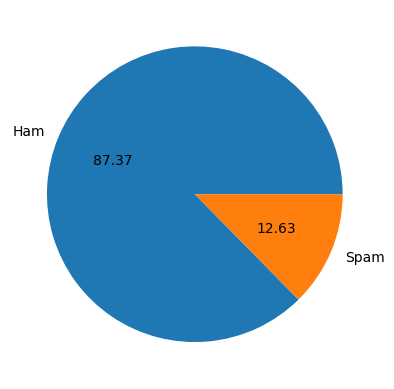

In [28]:
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(), labels=['Ham','Spam'],autopct='%0.2f')

Here we can cleraly see that Data set has 87.37% Ham & 12.63%

In [29]:
import nltk

In [30]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Adding new columns

num_char

num_words

num_sent

In [31]:
df['num_char']= df['Text'].apply(len)

In [32]:
df['num_words']= df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [33]:
df['num_sent']= df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [34]:
df.head()

,Target,Text,num_char,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [35]:
df[['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [36]:
#Targeting Ham(0)
df[df['Target']==0][['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [37]:
#Targeting Spam(1)
df[df['Target']==1][['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [38]:
import seaborn as sns

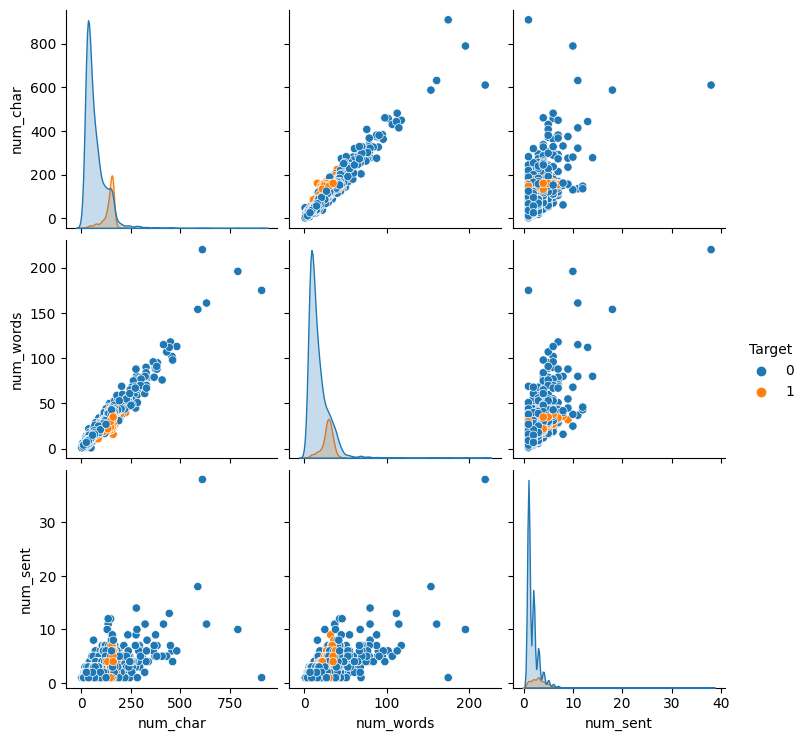

In [39]:
sns.pairplot(df,hue='Target')

###Heatmap

<Axes: >

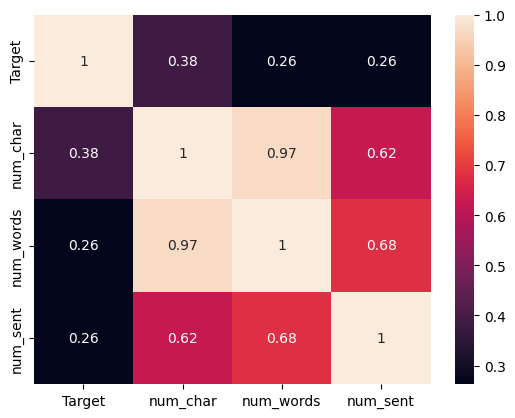

In [40]:
sns.heatmap(df[['Target','num_char','num_words','num_sent']].corr(), annot=True)

#Data Preprocessing


In [41]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
nltk.download('stopwords')
ps=PorterStemmer()
def transformText(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

transformed_Text=transformText("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")
print(transformed_Text)


gon na home soon want talk stuff anymor tonight k cri enough today


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [42]:
df['Text'][30]

"Wait that's still not all that clear, were you not sure about me being sarcastic or that that's why x doesn't want to live with us"

In [43]:
df["transformed_Text"] = df["Text"].apply(transformText)

In [44]:
df.head()

,Target,Text,num_char,num_words,num_sent,transformed_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [45]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='White')

In [46]:
spam_wc=wc.generate(df[df['Target']==1]['transformed_Text'].str.cat(sep=" "))

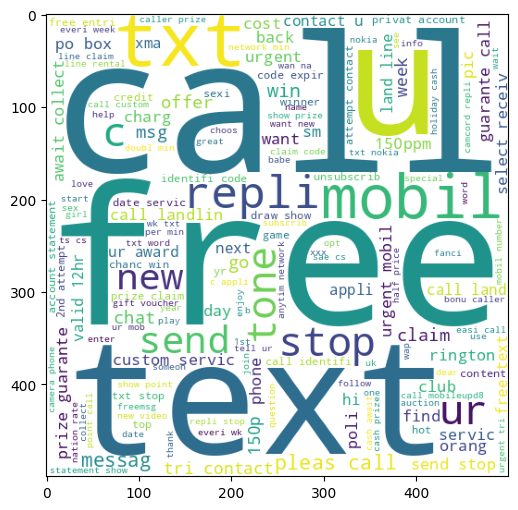

In [47]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [48]:
ham_wc=wc.generate(df[df['Target']==0]['transformed_Text'].str.cat(sep=" "))

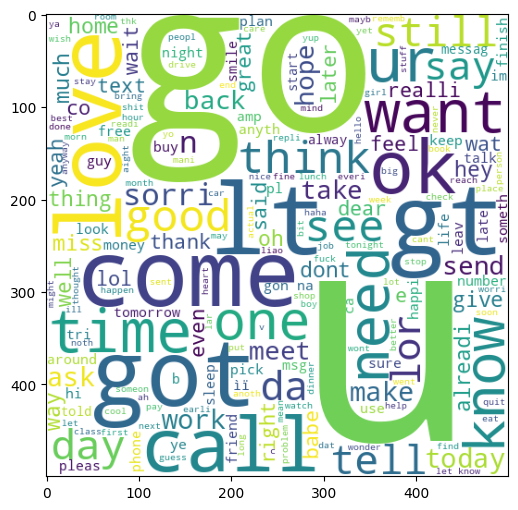

In [49]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [50]:
df.sample(5)

,Target,Text,num_char,num_words,num_sent,transformed_Text
2816,1,Gr8 Poly tones 4 ALL mobs direct 2u rply with ...,160,30,1,gr8 poli tone 4 mob direct 2u rpli poli titl 8...
2104,0,Anyway seriously hit me up when you're back be...,134,26,1,anyway serious hit back otherwis light armand ...
238,0,"New Theory: Argument wins d SITUATION, but los...",145,37,6,new theori argument win situat lose person don...
2789,0,When you are big..| God will bring success.,43,11,1,big god bring success
467,0,When are you going to ride your bike?,37,9,1,go ride bike


In [51]:
spam_corpus=[]
for msg in df[df['Target']==1]['transformed_Text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [52]:
len(spam_corpus)

9939

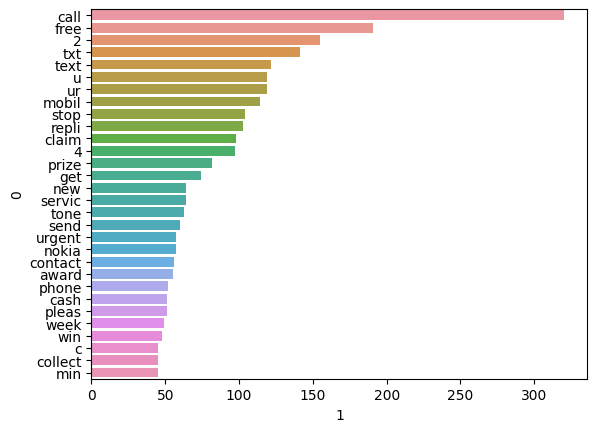

In [53]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[1] , y=pd.DataFrame(Counter(spam_corpus).most_common(30))[0])
plt.show()

In [54]:
ham_corpus=[]
for msg in df[df['Target']==0]['transformed_Text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [55]:
len(ham_corpus)

35404

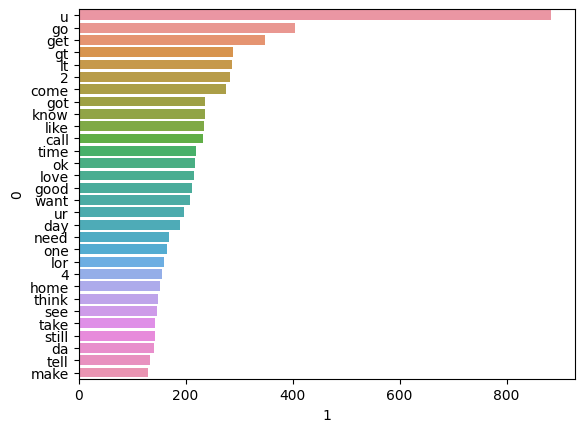

In [56]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[1] , y=pd.DataFrame(Counter(ham_corpus).most_common(30))[0])
plt.show()

#Model Building

###Feature Extraction

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf =TfidfVectorizer(max_features=3000)

In [58]:
X = tfidf.fit_transform(df['transformed_Text']).toarray()

In [59]:
y= df['Target'].values

###Splitting Data
Training Data
Test Data

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

##Training the Model

###Logistic Regression

In [77]:
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression()
lrc.fit(X_train, y_train)

LogisticRegression()

###MultinominalNB

In [78]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

#Evaluating the training model

In [65]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

###Logistic Regression Evaluation

In [70]:
#Prediction on test data
y_pred0 = lrc.predict(X_test)
print(accuracy_score(y_test, y_pred0))
print(confusion_matrix(y_test, y_pred0))
print(precision_score(y_test, y_pred0))

0.9506769825918762
[[894   0]
 [ 51  89]]
1.0


###MultinominalNB Evaluation

In [71]:
#prediction on test data
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9690522243713733
[[894   0]
 [ 32 108]]
1.0


#Building a Predictive System

In [76]:

input_msg="You’ve won! Congratulations! You’ve won a $500 Amazon gift card. Claim it here"

#Transforming input data

transformedInput = transformText(input_msg)
vector_input = tfidf.transform([transformedInput])

#makeing prediction
prediction = mnb.predict(vector_input)[0]
if(prediction==1):
  print("Spam SMS")
else:
  print("Ham SMS")

Spam SMS
